#**Simulasi Gerak Osilasi Dua Pendulum**

Osilasi gerak dua pendulum yang terhubung atau pendulum kopel (*coupled pendulum*) adalah gerakan bolak-balik dua bandul yang saling memengaruhi satu sama lain melalui mekanisme kopling. Masing-masing pendulum memiliki massa
$m$ dan panjang
$L$, sehingga jika berayun dengan sudut kecil, gerakannya dapat didekati sebagai osilasi harmonik sederhana. Dalam pendekatan sudut kecil, simpangan $θ$ memenuhi hubungan
$sin θ≈θ$, sehingga torsi gravitasi yang membuat pendulum kembali ke posisi setimbang dapat dituliskan secara linear sebagai
$mgLθ$. Ketika dua pendulum ini dihubungkan, misalnya dengan pegas, batang lentur, atau kawat yang mampu menyalurkan gaya pemulih tambahan, maka akan timbul torsi kopling yang besarnya bergantung pada selisih sudut kedua pendulum. Torsi kopling ini biasanya ditulis dalam bentuk $k_c(θ_1 - θ_2)$ dengan $k_c$ adalah konstanta kopling yang menentukan seberapa kuat interaksi antara dua pendulum.

Dengan menggabungkan pengaruh gravitasi dan kopling, persamaan gerak masing-masing pendulum dapat diturunkan. Karena pendulum memiliki momen inersia $I=mL^2$ dengan menggunakan hukum II Newton untuk rotasi, maka persamaan gerak pendulum pertama dapat dituliskan sebagai:

$$I\ddot{θ_1}+mgLθ_1+k_c(θ_1-θ_2)=0$$

sementara pendulum kedua memenuhi

$$I\ddot{θ_2}+mgLθ_2+k_c(θ_2-θ_1)=0$$

Dalam sistem nyata, biasanya juga terdapat redaman akibat gesekan udara atau gesekan pada titik tumpu pendulum, sehingga muncul suku redaman $\dot{bθ}$. Jika redaman ini disertakan, persamaan menjadi

$$I\ddot{θ_1}+\dot{bθ_1}+mgLθ_1+k_c(θ_1-θ_2)=0$$

$$I\ddot{θ_1}+\dot{bθ_2}+mgLθ_2+k_c(θ_2-θ_1)=0$$

Susun dalam bentuk orde-1 untuk integrator numerik:


$$y=[θ_1,\dot{θ_1}, θ_2, \dot{θ_2}]$$

**Mode normal (tanpa redaman)**:

1. Mode sinkron (simetris):$θ_1=θ_2$ Kopling tidak berpengaruh pada frekuensi

$$ω_{sym}=\sqrt{\frac{g}{L}}$$

2. Mode antisinkron (berlawanan arah):$θ_1=-θ_2$ Kopling menambah konstanta pada frekuensi

$$ω_{antisym}=\sqrt{\frac{g}{L}+\frac{2k_c}{I}}=\sqrt{\frac{g}{L}+\frac{2k_c}{mL^2}}$$

Energi total sistem terdiri dari tiga komponen: energi kinetik dari masing-masing pendulum yang bernilai

$$E_{kin}=\frac{1}{2}I\dot{θ}^2$$

energi potensial gravitasi (dalam pendekatan sudut kecil)

$$E_{pot}=\frac{1}{2}mgLθ^2$$

dan energi kopling yang muncul akibat perbedaan sudut kedua pendulum

$$E_{kopling}=\frac{1}{2}k_c(θ_1-θ_2)^2$$


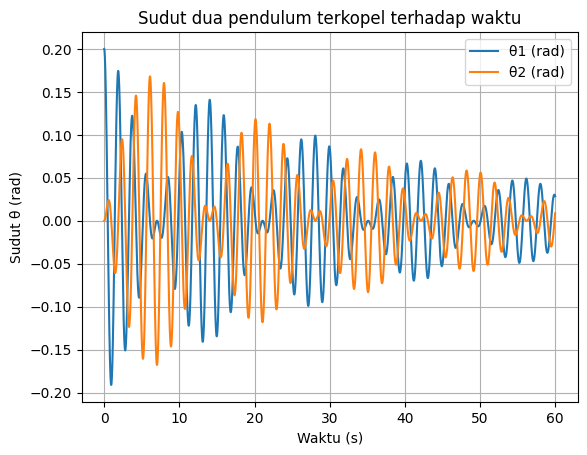

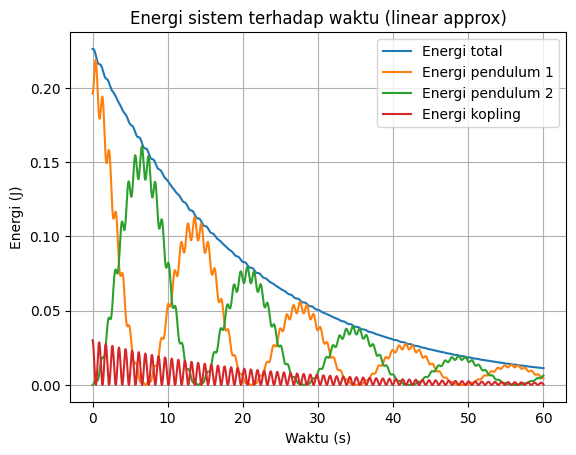

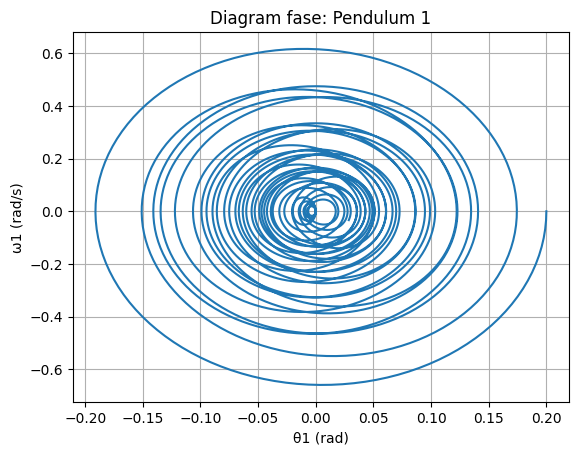

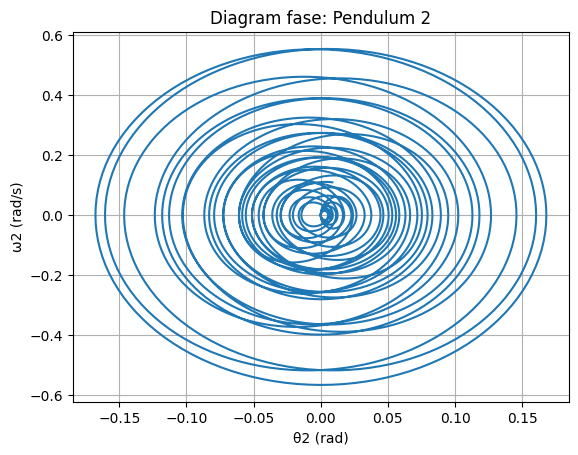

In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Parameter fisika
m = 1.0        # massa (kg)
L = 1.0        # panjang tali (m)
g = 9.81       # gravitasi (m/s^2)
I = m * L**2   # momen inersia untuk osilasi kecil
kc = 1.5       # konstanta kopling (torque per radian)
b = 0.05       # koefisien redaman (Nms/rad)

def rhs(t, y):
    th1, w1, th2, w2 = y
    th1_dd = -(b*w1 + m*g*L*th1 + kc*(th1 - th2)) / I
    th2_dd = -(b*w2 + m*g*L*th2 + kc*(th2 - th1)) / I
    return [w1, th1_dd, w2, th2_dd]

# Kondisi awal
theta1_0 = 0.2
omega1_0 = 0.0
theta2_0 = 0.0
omega2_0 = 0.0
y0 = [theta1_0, omega1_0, theta2_0, omega2_0]

t_span = (0, 60)
t_eval = np.linspace(t_span[0], t_span[1], 4000)

sol = solve_ivp(rhs, t_span, y0, t_eval=t_eval, rtol=1e-9, atol=1e-9)
t = sol.t
th1 = sol.y[0]
w1 = sol.y[1]
th2 = sol.y[2]
w2 = sol.y[3]

# Energi
E1 = 0.5 * I * w1**2 + 0.5 * m * g * L * th1**2
E2 = 0.5 * I * w2**2 + 0.5 * m * g * L * th2**2
E_couple = 0.5 * kc * (th1 - th2)**2
E_total = E1 + E2 + E_couple

# Plot sudut terhadap waktu
plt.plot(t, th1, label='θ1 (rad)')
plt.plot(t, th2, label='θ2 (rad)')
plt.xlabel('Waktu (s)')
plt.ylabel('Sudut θ (rad)')
plt.title('Sudut dua pendulum terkopel terhadap waktu')
plt.legend()
plt.grid(True)
plt.show()

# Plot energi
plt.plot(t, E_total, label='Energi total')
plt.plot(t, E1, label='Energi pendulum 1')
plt.plot(t, E2, label='Energi pendulum 2')
plt.plot(t, E_couple, label='Energi kopling')
plt.xlabel('Waktu (s)')
plt.ylabel('Energi (J)')
plt.title('Energi sistem terhadap waktu (linear approx)')
plt.legend()
plt.grid(True)
plt.show()

# Diagram fase
plt.plot(th1, w1)
plt.xlabel('θ1 (rad)')
plt.ylabel('ω1 (rad/s)')
plt.title('Diagram fase: Pendulum 1')
plt.grid(True)
plt.show()

plt.plot(th2, w2)
plt.xlabel('θ2 (rad)')
plt.ylabel('ω2 (rad/s)')
plt.title('Diagram fase: Pendulum 2')
plt.grid(True)
plt.show()

##**Hasil Analisis**

1. **Grafik sudut terhadap waktu**

Pada awal simulasi, hanya pendulum pertama yang memiliki sudut awal sehingga kurva $θ_1$ dimulai dengan amplitudo besar, sedangkan $θ_2$ masih nol. Namun seiring waktu berjalan, amplitudo $θ_1$ berkurang dan $θ_2$ mulai membesar. Hal ini menandakan bahwa energi awal yang dimiliki pendulum pertama berpindah menuju pendulum kedua melalui gaya kopling. Setelah beberapa saat, amplitudo $θ_2$ menjadi lebih besar daripada $θ_1$, lalu kembali berpindah lagi dan proses ini menciptakan pola naik-turun amplitudo.

2. **Grafik Energi Terhadap Waktu**

Pada grafik dapat dilihat energi semakin menurun sepanjang waktu akibat dari redaman. Sesuai dengan kenyataan dimana pendulum tidak akan terus bergerak selamanya, lama-lama pasti akan berhenti. Energi pendulum pertama awalnya paling besar, lalu berpindah ke pendulum kedua sehingga energinya naik. Proses saling memberikan energi ini terjadi beberapa kali, tetapi karena ada redaman, total energi sistem terus menurun sampai akhirnya hampir habis. Jadi grafik energi memperlihatkan dua hal sekaligus, yaitu energi yang berpindah antar pendulum dan energi yang perlahan menghilang dari sistem.

3. **Diagram Fase pendulum 1 dan 2**

Pada diagram ini, setiap titik menggambarkan posisi dan kecepatan pendulum pada satu waktu. Karena pendulum berayun bolak-balik, grafiknya membentuk putaran seperti lingkaran. Namun karena redaman, lingkaran itu semakin mengecil dari waktu ke waktu.


In [10]:
# Frekuensi normal teoritis
omega_sym = np.sqrt(g / L)
omega_antisym = np.sqrt(g / L + 2*kc / I)
print("Frekuensi mode sinkron (rad/s):", omega_sym)
print("Frekuensi mode anti-sinkron (rad/s):", omega_antisym)

Frekuensi mode sinkron (rad/s): 3.132091952673165
Frekuensi mode anti-sinkron (rad/s): 3.5791060336346563


Sistem dua pendulum punya dua cara bergetar alami, yaitu satu saat keduanya bergerak bersama, dan satu lagi saat mereka bergerak berlawanan arah. Karena keduanya memiliki frekuensi yang sedikit berbeda, perbedaan inilah yang memunculkan pola beat yang terlihat pada grafik. semakin besar konstanta kopling, semakin besar selisih antara dua frekuensi dan beat akan semakin cepat.